# 画像生成 AI 入門: Python による拡散モデルの理論と実践

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/shunk031/coloso-python-diffusion-models/blob/main/lectures/section-02-05.ipynb)


## Section 02: Basic Knowledge of Deep Learning

最先端の画像生成 AI である拡散モデル (diffusion model) を支える深層学習技術 (deep learning) について導入します。


### Lecture 05: About Deep Learning (2)

Meta 社が作成している `pytorch` ライブラリを使用してニューラルネットワークに関わる演算について実際に動かしてみましょう。

## テンソルの作成と操作

PyTorch において最初に理解すべき概念として、テンソル (`torch.Tensor`) があります。
テンソルとは、任意の次元の配列（多次元配列）を扱うためのデータ構造です。
具体的には 0 次元のテンソルは数値（スカラー値）、1 次元のテンソルはベクトル、2 次元のテンソルは行列に対応します。
似ている概念として [Numpy](https://numpy.org/) の `numpy.ndarray` と同様のデータ構造です。

PyTorch のテンソルには次のような型が準備されています:

| データ型              | 型名 (`dtype`)  | PyTorch におけるクラス名 |
|-----------------------|-----------------|--------------------------|
| 32 ビット浮動小数点数 | `torch.float32` / `torch.float` | `torch.FloatTensor`      |
| 64 ビット浮動小数点数 | `torch.float64` / `torch.double` | `torch.DoubleTensor` |
| 16 ビット浮動小数点数 | `torch.float16` / `torch.half` | `torch.FalfTensor` |
| 8 ビット整数（符号なし）| `torch.uint8` | `torch.ByteTensor` |
| 8 ビット整数（符号あり）| `torch.int8` | `torch.CharTensor` |
| 16 ビット整数（符号あり）| `torch.int16` / `torch.short` | `torch.ShortTensor` |
| 32 ビット整数（符号あり）| `torch.int32` / `torch.int` | `torch.IntTensor` |
| 64 ビット整数（符号あり）| `torch.int64` / `torch.long` | `torch.LongTensor`|
| 真偽値 | `torch.bool` | `torch.BoolTensor` |

- 参考 torch.Tensor — PyTorch documentation https://pytorch.org/docs/stable/tensors.html#data-types

PyTorch のテンソルは Python の数値のリストから作成することができます。以下はその例です:

### 浮動小数点 (float) テンソル作成

In [ ]:
import torch

float_tensor = torch.tensor([[0.0, 0.5], [1.0, 1.5]])
print(float_tensor)

tensor([[0.0000, 0.5000],
        [1.0000, 1.5000]])


In [ ]:
print(float_tensor.type())

torch.FloatTensor


### 整数 (long) テンソルの作成

In [ ]:
long_tensor = torch.tensor([1, 2, 3, 4])
print(long_tensor)

tensor([1, 2, 3, 4])


In [ ]:
print(long_tensor.type())

torch.LongTensor


Note: Python のリストに含まれている数値の型を PyTorch が自動で認識し、それに合わせた型のテンソルが作成されていることに注意してください。
また、numpy の `numpy.ndarray` からテンソルに効率的に変換する関数である `torch.from_numpy` という関数も用意されています。

In [ ]:
import numpy as np

numpy_array = np.array([1, 2, 3])
print(torch.from_numpy(numpy_array))

tensor([1, 2, 3])


PyTorch にはよく使うテンソルを簡単に生成する関数が用意されています。以下それらの例です:

### すべての要素が 0 の 2 次元整数テンソルを作成

In [ ]:
zero_tensor = torch.zeros(2, 2, dtype=torch.long)
print(zero_tensor)

tensor([[0, 0],
        [0, 0]])


In [ ]:
print(zero_tensor.type())

torch.LongTensor


`torch.zeros` の第一、第二引数にはそれぞれ 1 次元目、2 次元目の要素数を指定しています。
同様の方法で、任意の次元に含まれる要素を指定可能です。
さらに、テンソルを作成する関数では、`dtype` 引数に型名を入力することで作成するテンソルの型を明示できます。

### すべての要素が 1 の 3 次元浮動小数点数テンソルを作成

In [ ]:
one_tensor = torch.ones(2, 2, 2)
print(one_tensor)

tensor([[[1., 1.],
         [1., 1.]],

        [[1., 1.],
         [1., 1.]]])


In [ ]:
print(one_tensor.type())

torch.FloatTensor


Note: `dtype` を指定しなかったため、デフォルトである浮動小数点数テンソルが作成されました。

### ランダムな値からテンソルを作成

In [ ]:
randn_tensor = torch.randn(4)
print(randn_tensor)

tensor([ 2.1879,  1.0460, -0.7609,  0.7790])


In [ ]:
rand_tensor = torch.rand((2, 2))
print(rand_tensor)

tensor([[0.4753, 0.4489],
        [0.4224, 0.7686]])


`torch.randn` は標準正規分布（平均 $\mu = 0$、分散 $\sigma^2 = 1$）から、`torch.rand` は 0 以上 1 未満の区間の一様分布から、それぞれサンプリングしてテンソルを生成します。

### テンソルの型とその変換

テンソルの型を変換したい場合は、変換したいテンソルに対して、型名に対応するメソッドを呼び出します。
例えば浮動小数点数に変換したい場合は `float`、整数に変換したい場合は `long` を呼び出します。

In [ ]:
float_tensor = torch.FloatTensor([[1, 2, 3], [4, 5, 6]])
print(float_tensor.type())

torch.FloatTensor


In [ ]:
long_tensor = float_tensor.long()
print(long_tensor.type())

torch.LongTensor


In [ ]:
float_tensor = long_tensor.float()
print(float_tensor.type())

torch.FloatTensor


### テンソルの形状の変換

テンソルは含まれる要素数が同じであれば、`view` メソッドを用いて自由に形状を変更可能です。また `transpose` メソッドを用いると、次元を入れ替えることが可能です。以下、4 つの要素を持つ 1 次元ベクトルを、$2 \times 2$ の行列に変換し、0 次元目と 1 次元目を入れ替える例を示します:

In [ ]:
float_tensor = torch.FloatTensor([1, 2, 3, 4])
float_tensor = float_tensor.view(2, 2)
print(float_tensor)

tensor([[1., 2.],
        [3., 4.]])


In [ ]:
float_tensor = float_tensor.transpose(0, 1)
print(float_tensor)

tensor([[1., 3.],
        [2., 4.]])


### テンソルのインデックス指定・スライス・連結

Python の配列や numpy の `ndarray` と同様に、PyTorch のテンソルはインデックスの指定による要素の参照や、スライス操作をサポートしています。

In [ ]:
float_tensor = torch.FloatTensor([[1, 2, 3], [4, 5, 6]])
print(float_tensor[0])

tensor([1., 2., 3.])


In [ ]:
print(float_tensor[1, 1])

tensor(5.)


In [ ]:
print(float_tensor[0, 1:3])

tensor([2., 3.])


In [ ]:
print(float_tensor[:, 0:2])

tensor([[1., 2.],
        [4., 5.]])


`float_tensor[:, 0:2]` の `:` は、その次元のすべての範囲を示します。

上記に加えて、`torch.cat` を使うことで、テンソルを任意の次元で連結ができます。
さらに `dim` 引数を使用して連結する次元を指定することが可能です:

In [ ]:
print(torch.cat([float_tensor, float_tensor]))

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [1., 2., 3.],
        [4., 5., 6.]])


In [ ]:
print(torch.cat([float_tensor, float_tensor], dim=1))

tensor([[1., 2., 3., 1., 2., 3.],
        [4., 5., 6., 4., 5., 6.]])


## テンソルを用いた演算

PyTorch では様々な演算をテンソルの各要素単位で実行可能です。以下、`torch.add` や `torch.mul` を用いて加減乗除を含む演算を行います。これらの演算はそれぞれ `+` や `*` といった演算子に対応しています。

In [ ]:
tensor1 = torch.FloatTensor([1, 2, 3])
tensor2 = torch.FloatTensor([4, 5, 6])
print(torch.add(tensor1, tensor2))

tensor([5., 7., 9.])


In [ ]:
print(tensor1 + tensor2)

tensor([5., 7., 9.])


In [ ]:
print(torch.mul(tensor1, tensor2))

tensor([ 4., 10., 18.])


In [ ]:
print(tensor1 * tensor2)

tensor([ 4., 10., 18.])


`torch.matmul` は、入力されたテンソルが 1 次元の場合ではベクトルの内積、2 次元の場合では、行列積を計算します。

In [ ]:
tensor1 = torch.FloatTensor([1, 2, 3, 4])
tensor2 = torch.FloatTensor([5, 6, 7, 8])
print(torch.matmul(tensor1, tensor2))

tensor(70.)


In [ ]:
tensor1 = tensor1.view(2, 2)
tensor2 = tensor2.view(2, 2)
print(torch.matmul(tensor1, tensor2))

tensor([[19., 22.],
        [43., 50.]])


## 計算グラフと自動微分

PyTorch ではテンソルに対して行われたすべての操作を記録し、計算グラフを構築します。
自動微分は、誤差逆伝播法と同様の手続きによって、各テンソルの勾配を計算する機能です。
計算グラフを出力から入力へたどって偏微分を計算していくことによって実現されます。
$y = wx + b$ を例に、自動微分を計算してみます。

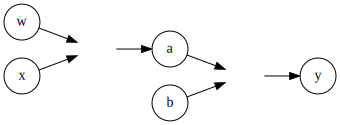

In [ ]:
from graphviz import Digraph

dot = Digraph()
dot.attr("graph", rankdir="LR")
dot.attr("node", shape="circle")

dot.node(name="w", label="w")
dot.node(name="x", label="x")
dot.node(name="mul", label="✕", color="white")

dot.node(name="a", label="a")
dot.node(name="b", label="b")
dot.node(name="add", label="＋", color="white")

dot.node(name="y", label="y")

dot.edge("w", "mul")
dot.edge("x", "mul")
dot.edge("mul", "a")

dot.edge("a", "add")
dot.edge("b", "add")
dot.edge("add", "y")

dot

In [ ]:
x = torch.tensor(3, dtype=torch.float, requires_grad=True)
w = torch.tensor(1, dtype=torch.float, requires_grad=True)
b = torch.tensor(2, dtype=torch.float, requires_grad=True)
y = w * x + b
y.backward()

print(x.grad)

tensor(1.)


In [ ]:
print(w.grad)

tensor(3.)


In [ ]:
print(b.grad)

tensor(1.)


PyTorch のテンソルでは、`requires_grad` 引数に `True` を指定することで自動微分を有効化したテンソルを作成できます。
上のコードでは 1 行目から 3 行目でテンソルを作成し、4 行目で計算グラフを構築し、5 行目で $y$ に対して `backward` を呼ぶことで、$x, w, b$ のそれぞれのテンソルに対して勾配を計算しています。この結果、各テンソルの `grad` プロパティに勾配の値が格納されます。$\partial y / \partial x = w = 1, \partial y / \partial w = x = 3, \partial y / \partial b = 1$ から、各勾配の値が正しく計算されていることがわかります。

ニューラルネットワークでは、各テンソルの勾配を用いて損失関数の値を最小化するようにパラメータを更新していくことで学習が行われます。また PyTorcyh では損失関数が出力したテンソルに対して `backward` メソッドを呼ぶことで、モデルに含まれているパラメータに対して勾配を計算し、計算した勾配をもとにパラメータを更新することで学習を行います。

## GPU の使用

PyTorch では、GPU を使って簡単にテンソルを用いた演算を行うことができます。
GPU は並列計算が得意な演算装置であり、ニューラルネットワークに頻出する行列計算を CPU よりも高速に行うことができるため、ニューラルネットワークの学習や推論に広く用いられています。GPU でテンソルを用いた演算を行うためには、まずテンソルを GPU のメモリ上にコピーする必要があります。これには `to` メソッドを使用します。

In [ ]:
tensor = torch.tensor([1, 2, 3])
print(tensor)

tensor([1, 2, 3])


`to` メソッドに GPU を示す `cuda` を指定して GPU 上のメモリにコピーします。

In [ ]:
print(tensor.to("cuda"))

tensor([1, 2, 3], device='cuda:0')


テンソルの演算は必ず同じデバイス（CPU なら CPU、GPU なら GPU）のメモリ上で行う必要があります。もし異なるデバイスのメモリにあるテンソル同士を演算してしまうと、下記のように `RuntimeError` が発生します。

In [ ]:
cpu_tensor = torch.ones(2)
gpu_tensor = torch.zeros(2).to("cuda")

cpu_tensor + gpu_tensor # RuntimeError!!

RuntimeError: ignored

## まとめ

深層学習フレームワークの PyTorch の基本的な使い方を導入しました。
ニューラルネットワークを構築する上で重要なテンソルの概念を紹介し、そのテンソルを PyTorch 上でどのように扱うかについて説明しました。以降紹介する diffusers では複雑になりがちな PyTorch プログラミングをパイプライン化し簡単に扱えるような仕組みが備わっています。